STEP 1 : DATA INSERTION WITH STATS

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
# For consistent results
np.random.seed(42)

In [3]:
#set plotting style
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
df = pd.read_csv("/content/drive/MyDrive/ML_projects/customer_churn_prediction/WA_Fn-UseC_-Telco-Customer-Churn.csv")

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No


In [9]:
df.isnull().sum()

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [11]:
print(f"Shape: {df.shape}")
print(f"Columns: {list(df.columns)}")

Shape: (7043, 21)
Columns: ['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn']


In [ ]:
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  704

In [12]:
# Numerical columns statistics
print("Numerical Columns Statistics:")
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if 'SeniorCitizen' in df.columns:
    numeric_cols.append('SeniorCitizen')
print(df[numeric_cols].describe())

Numerical Columns Statistics:
       SeniorCitizen       tenure  MonthlyCharges  SeniorCitizen
count    7043.000000  7043.000000     7043.000000    7043.000000
mean        0.162147    32.371149       64.761692       0.162147
std         0.368612    24.559481       30.090047       0.368612
min         0.000000     0.000000       18.250000       0.000000
25%         0.000000     9.000000       35.500000       0.000000
50%         0.000000    29.000000       70.350000       0.000000
75%         0.000000    55.000000       89.850000       0.000000
max         1.000000    72.000000      118.750000       1.000000


In [13]:
# Categorical columns statistics
print("Categorical Columns Statistics:")
categorical_cols = df.select_dtypes(include=['object']).columns.tolist()
for col in categorical_cols:
    print(f"\n{col}:")
    print(f"Unique values: {df[col].nunique()}")
    print(f"Most frequent: {df[col].mode()[0]}")
    print(f"Frequency: {df[col].value_counts().iloc[0]}")

Categorical Columns Statistics:

customerID:
Unique values: 7043
Most frequent: 0002-ORFBO
Frequency: 1

gender:
Unique values: 2
Most frequent: Male
Frequency: 3555

Partner:
Unique values: 2
Most frequent: No
Frequency: 3641

Dependents:
Unique values: 2
Most frequent: No
Frequency: 4933

PhoneService:
Unique values: 2
Most frequent: Yes
Frequency: 6361

MultipleLines:
Unique values: 3
Most frequent: No
Frequency: 3390

InternetService:
Unique values: 3
Most frequent: Fiber optic
Frequency: 3096

OnlineSecurity:
Unique values: 3
Most frequent: No
Frequency: 3498

OnlineBackup:
Unique values: 3
Most frequent: No
Frequency: 3088

DeviceProtection:
Unique values: 3
Most frequent: No
Frequency: 3095

TechSupport:
Unique values: 3
Most frequent: No
Frequency: 3473

StreamingTV:
Unique values: 3
Most frequent: No
Frequency: 2810

StreamingMovies:
Unique values: 3
Most frequent: No
Frequency: 2785

Contract:
Unique values: 3
Most frequent: Month-to-month
Frequency: 3875

PaperlessBilling:
U

In [14]:
print("Churn Distribution:")
churn_dist = df['Churn'].value_counts()
churn_percentage = df['Churn'].value_counts(normalize=True) * 100
print(f"Total Customers: {len(df)}")
print(f"Churned: {churn_dist.get('Yes', 0)} ({churn_percentage.get('Yes', 0):.2f}%)")
print(f"Retained: {churn_dist.get('No', 0)} ({churn_percentage.get('No', 0):.2f}%)")

Churn Distribution:
Total Customers: 7043
Churned: 1869 (26.54%)
Retained: 5174 (73.46%)


In [15]:
# Class imbalance check
print(f"\nClass Imbalance Ratio: {churn_dist.get('Yes', 1)/churn_dist.get('No', 1):.3f}")


Class Imbalance Ratio: 0.361


In [16]:
# Check for duplicates
duplicates = df.duplicated().sum()
print(f"Duplicate rows: {duplicates}")

Duplicate rows: 0


In [17]:
# Check data types consistency
print("\nData Type Consistency:")
for col in df.columns:
    print(f"{col}: {df[col].dtype}")

# Check TotalCharges column (might have empty strings)
if 'TotalCharges' in df.columns:
    print(f"\nTotalCharges unique values: {df['TotalCharges'].unique()[:10]}")
    # Convert TotalCharges to numeric
    df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
    print(f"TotalCharges NaN count: {df['TotalCharges'].isna().sum()}")


Data Type Consistency:
customerID: object
gender: object
SeniorCitizen: int64
Partner: object
Dependents: object
tenure: int64
PhoneService: object
MultipleLines: object
InternetService: object
OnlineSecurity: object
OnlineBackup: object
DeviceProtection: object
TechSupport: object
StreamingTV: object
StreamingMovies: object
Contract: object
PaperlessBilling: object
PaymentMethod: object
MonthlyCharges: float64
TotalCharges: object
Churn: object

TotalCharges unique values: ['29.85' '1889.5' '108.15' '1840.75' '151.65' '820.5' '1949.4' '301.9'
 '3046.05' '3487.95']
TotalCharges NaN count: 11


In [18]:
# Handle missing values
print("\nHandling Missing Values...")
initial_shape = df.shape

# Fill missing TotalCharges with median
if 'TotalCharges' in df.columns:
    median_total = df['TotalCharges'].median()
    df['TotalCharges'] = df['TotalCharges'].fillna(median_total)
    print(f"Filled {df['TotalCharges'].isna().sum()} missing values in TotalCharges with median: {median_total}")
print(f"\nData shape before cleaning: {initial_shape}")
print(f"Data shape after cleaning: {df.shape}")


Handling Missing Values...
Filled 0 missing values in TotalCharges with median: 1397.475

Data shape before cleaning: (7043, 21)
Data shape after cleaning: (7043, 21)


SET 2: DATA VISUALIZATION WITH CHARTS

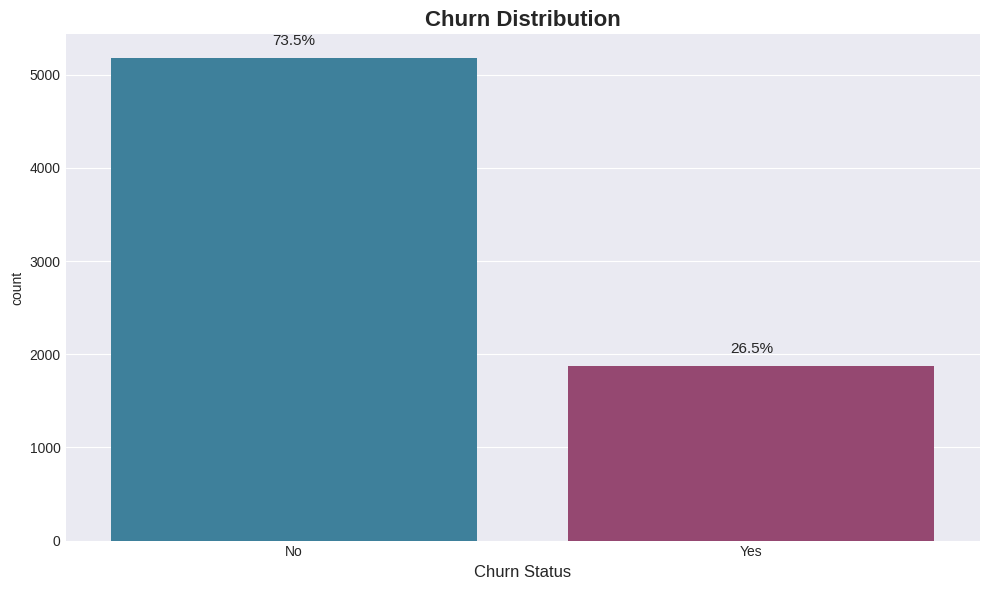

Text(0, 0.5, 'Count')

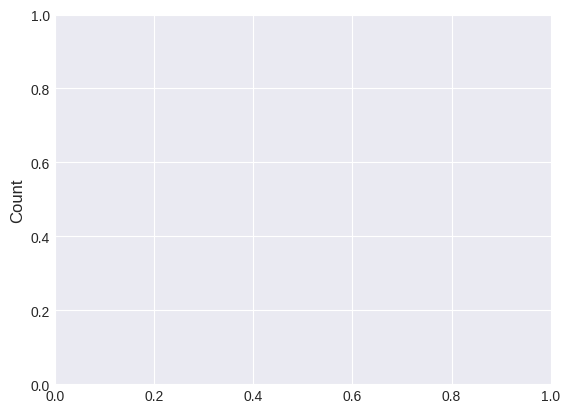

In [20]:
# Target variable distribution
plt.figure(figsize=(10, 6))
colors = ['#2E86AB', '#A23B72']
ax = sns.countplot(x='Churn', data=df, palette=colors)
plt.title('Churn Distribution', fontsize=16, fontweight='bold')
plt.xlabel('Churn Status', fontsize=12)# Add percentages on bars
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    x = p.get_x() + p.get_width() / 2
    y = p.get_height() + 0.02 * total
    ax.annotate(percentage, (x, y), ha='center', fontsize=11)

plt.tight_layout()
plt.show()
plt.ylabel('Count', fontsize=12)

Categorical Features Analysis


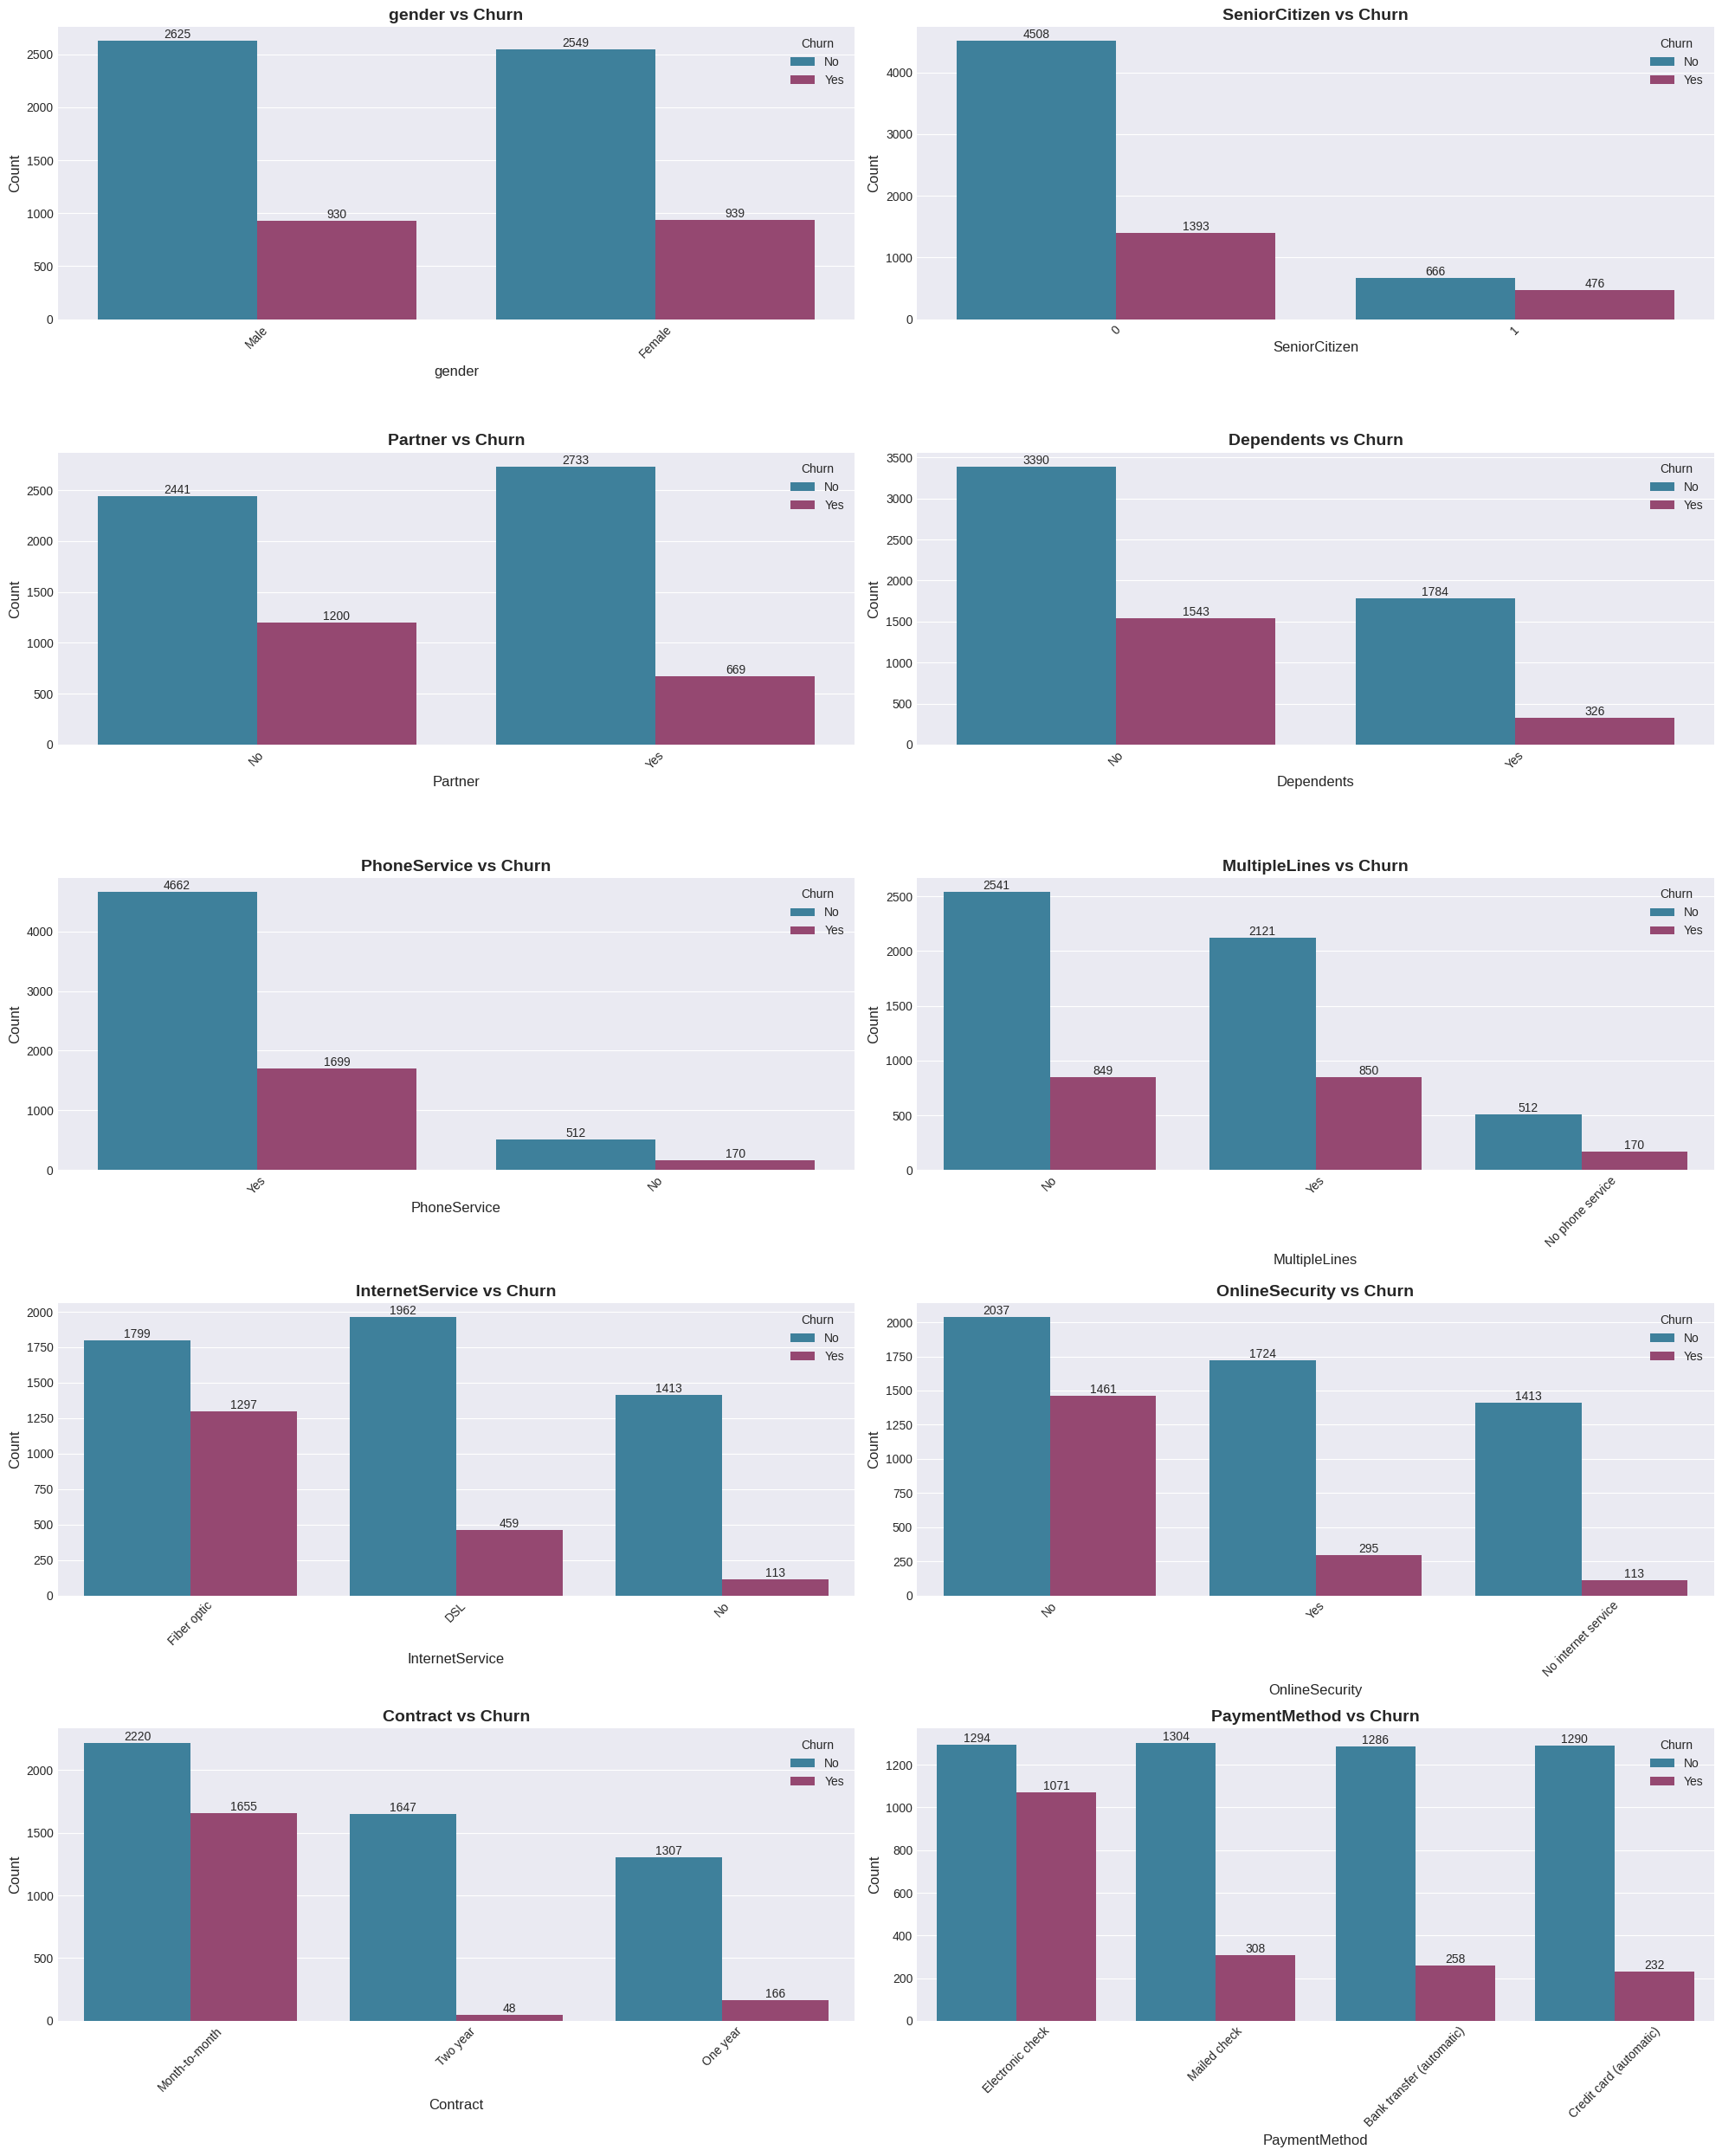

In [21]:
print("Categorical Features Analysis")
categorical_features = ['gender', 'SeniorCitizen', 'Partner', 'Dependents',
                       'PhoneService', 'MultipleLines', 'InternetService',
                       'OnlineSecurity', 'Contract', 'PaymentMethod']
fig, axes = plt.subplots(5, 2, figsize=(20, 25))
axes = axes.flatten()

for idx, feature in enumerate(categorical_features[:10]):
    # Create countplot with churn hue
    if feature in df.columns:
        if df[feature].nunique() > 10:  # For features with many categories
            top_categories = df[feature].value_counts().head(10).index
            temp_df = df[df[feature].isin(top_categories)]
        else:
            temp_df = df

        ax = sns.countplot(x=feature, hue='Churn', data=temp_df, ax=axes[idx],
                          palette=colors, order=temp_df[feature].value_counts().index)
        axes[idx].set_title(f'{feature} vs Churn', fontsize=14, fontweight='bold')
        axes[idx].set_xlabel(feature, fontsize=12)
        axes[idx].set_ylabel('Count', fontsize=12)
        axes[idx].tick_params(axis='x', rotation=45)
        axes[idx].legend(title='Churn')

        # Add percentage annotations
        for container in ax.containers:
            ax.bar_label(container, fmt='%.0f', fontsize=10)

plt.tight_layout()
plt.show()

Numerical Features Analysis


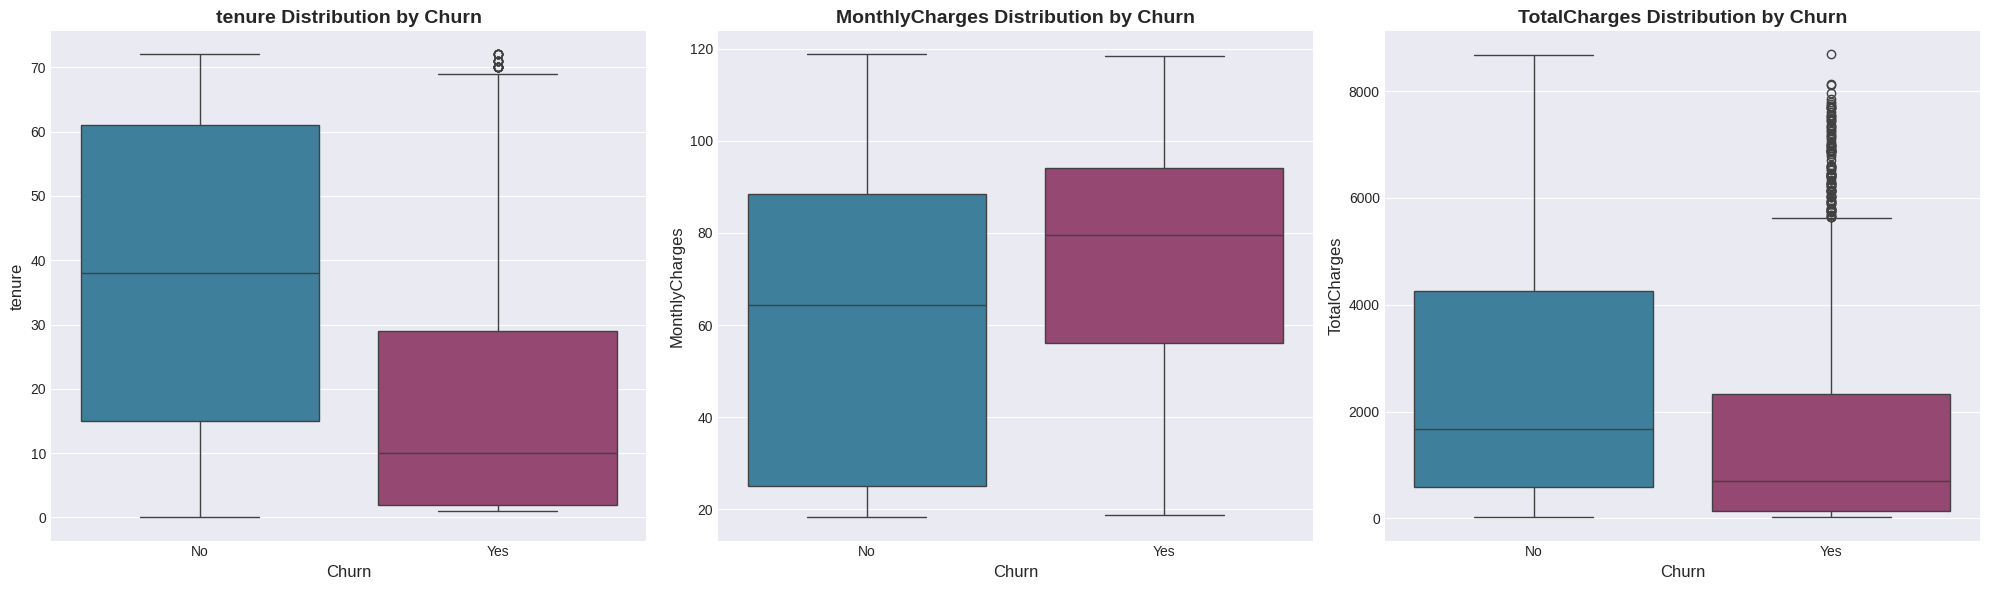

In [22]:
print("Numerical Features Analysis")

numerical_features = ['tenure', 'MonthlyCharges', 'TotalCharges']

fig, axes = plt.subplots(1, 3, figsize=(20, 6))

for idx, feature in enumerate(numerical_features):
    # Boxplot
    sns.boxplot(x='Churn', y=feature, data=df, ax=axes[idx], palette=colors)
    axes[idx].set_title(f'{feature} Distribution by Churn', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Churn', fontsize=12)
    axes[idx].set_ylabel(feature, fontsize=12)

plt.tight_layout()
plt.show()

Correlation Analysis


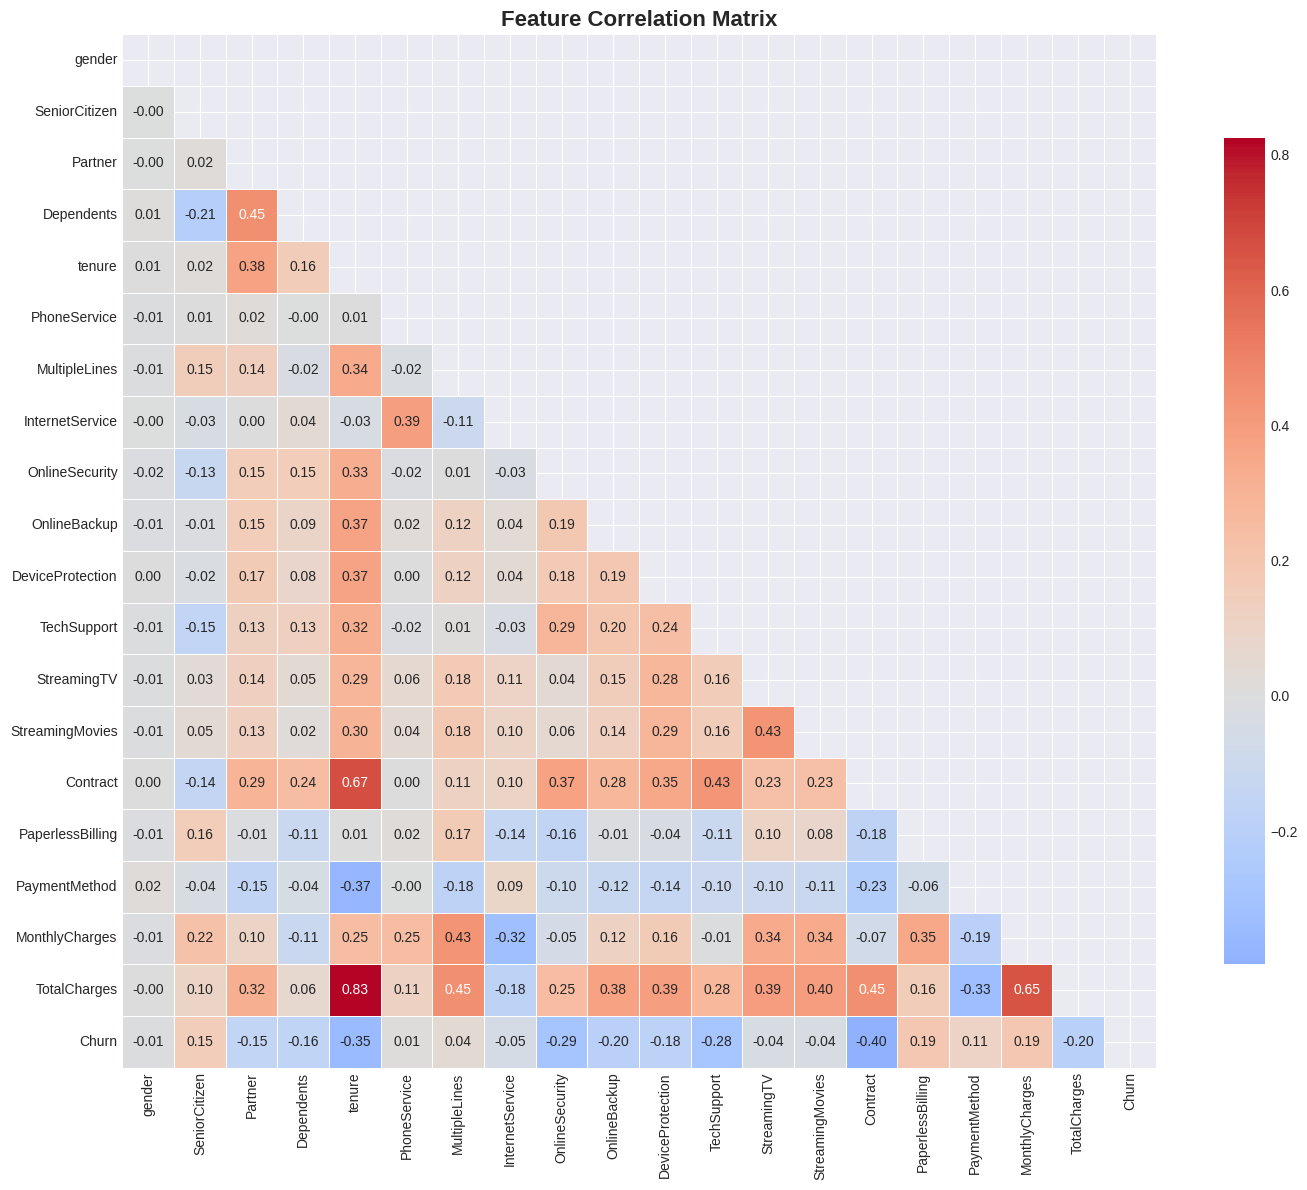

In [23]:
print("Correlation Analysis")

# Prepare data for correlation
df_numeric = df.copy()

# Encode categorical variables for correlation
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

for col in df_numeric.select_dtypes(include=['object']).columns:
    if col != 'customerID':
        df_numeric[col] = le.fit_transform(df_numeric[col].astype(str))

# Calculate correlation matrix
corr_matrix = df_numeric.drop('customerID', axis=1).corr()
# Plot heatmap
plt.figure(figsize=(15, 12))
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
           center=0, square=True, linewidths=.5, cbar_kws={"shrink": .8})
plt.title('Feature Correlation Matrix', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

Tenure Analysis


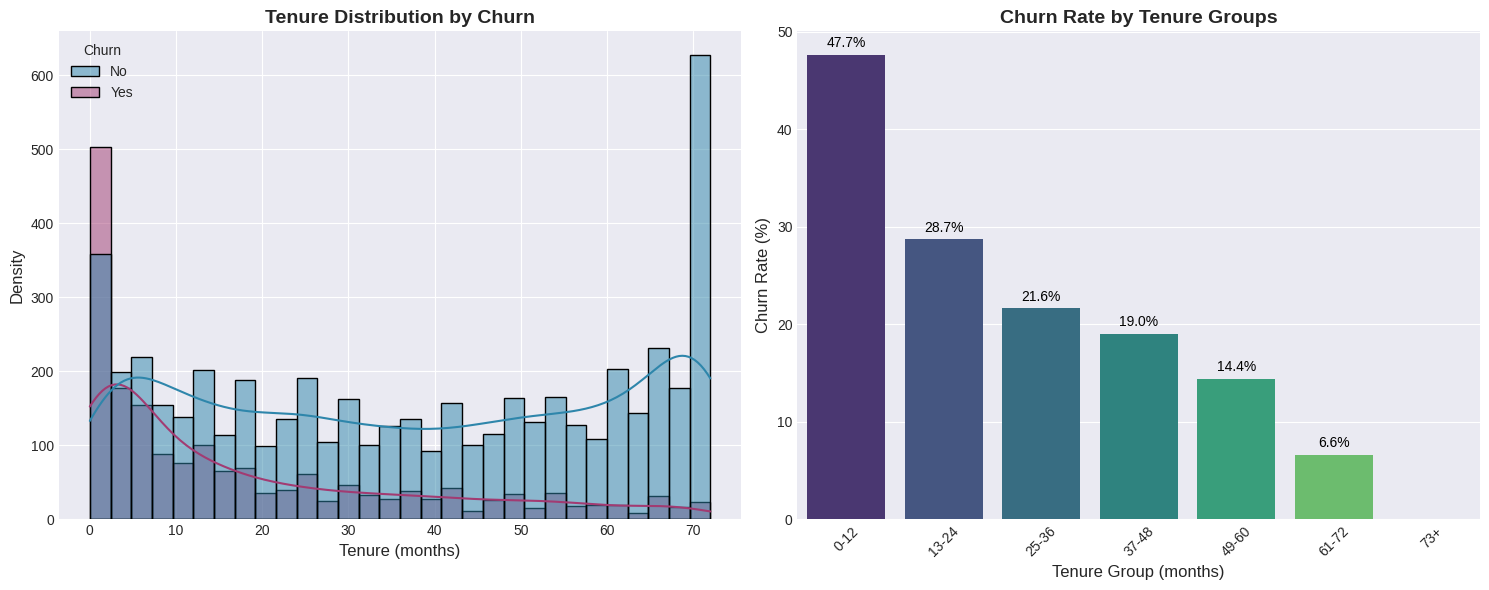

In [26]:
# Tenure analysis (Key Feature)
print("Tenure Analysis")

fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Tenure distribution by churn
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, ax=axes[0],
             palette=colors, bins=30)
axes[0].set_title('Tenure Distribution by Churn', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Tenure (months)', fontsize=12)
axes[0].set_ylabel('Density', fontsize=12)

# Churn rate by tenure groups
df['tenure_group'] = pd.cut(df['tenure'],
                           bins=[0, 12, 24, 36, 48, 60, 72, float('inf')],
                           labels=['0-12', '13-24', '25-36', '37-48', '49-60', '61-72', '73+'])

churn_by_tenure = df.groupby('tenure_group')['Churn'].apply(
    lambda x: (x == 'Yes').sum() / len(x) * 100
).reset_index()

sns.barplot(x='tenure_group', y='Churn', data=churn_by_tenure,
            ax=axes[1], palette='viridis')
axes[1].set_title('Churn Rate by Tenure Groups', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Tenure Group (months)', fontsize=12)
axes[1].set_ylabel('Churn Rate (%)', fontsize=12)
axes[1].tick_params(axis='x', rotation=45)

# Add value labels - FIXED VERSION
# Get the bar heights from the data
for i, (group, rate) in enumerate(zip(churn_by_tenure['tenure_group'], churn_by_tenure['Churn'])):
    axes[1].text(i, rate + 0.5, f'{rate:.1f}%',
                ha='center', va='bottom', fontsize=10, color='black')

plt.tight_layout()
plt.show()

Monthly Charges vs Total Charges Analysis


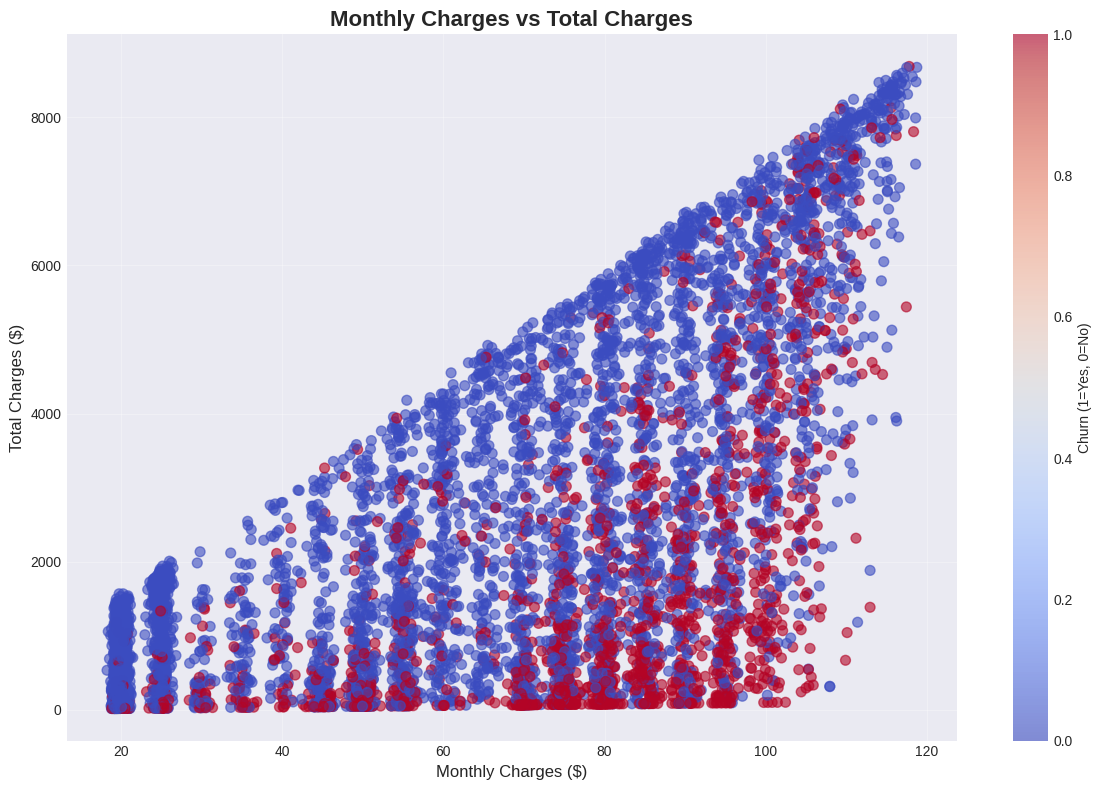

In [27]:
print("Monthly Charges vs Total Charges Analysis")

plt.figure(figsize=(12, 8))
scatter = plt.scatter(df['MonthlyCharges'], df['TotalCharges'],
                     c=df['Churn'].map({'Yes': 1, 'No': 0}),
                     cmap='coolwarm', alpha=0.6, s=50)
plt.colorbar(scatter, label='Churn (1=Yes, 0=No)')
plt.title('Monthly Charges vs Total Charges', fontsize=16, fontweight='bold')
plt.xlabel('Monthly Charges ($)', fontsize=12)
plt.ylabel('Total Charges ($)', fontsize=12)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Payment Method Analysis


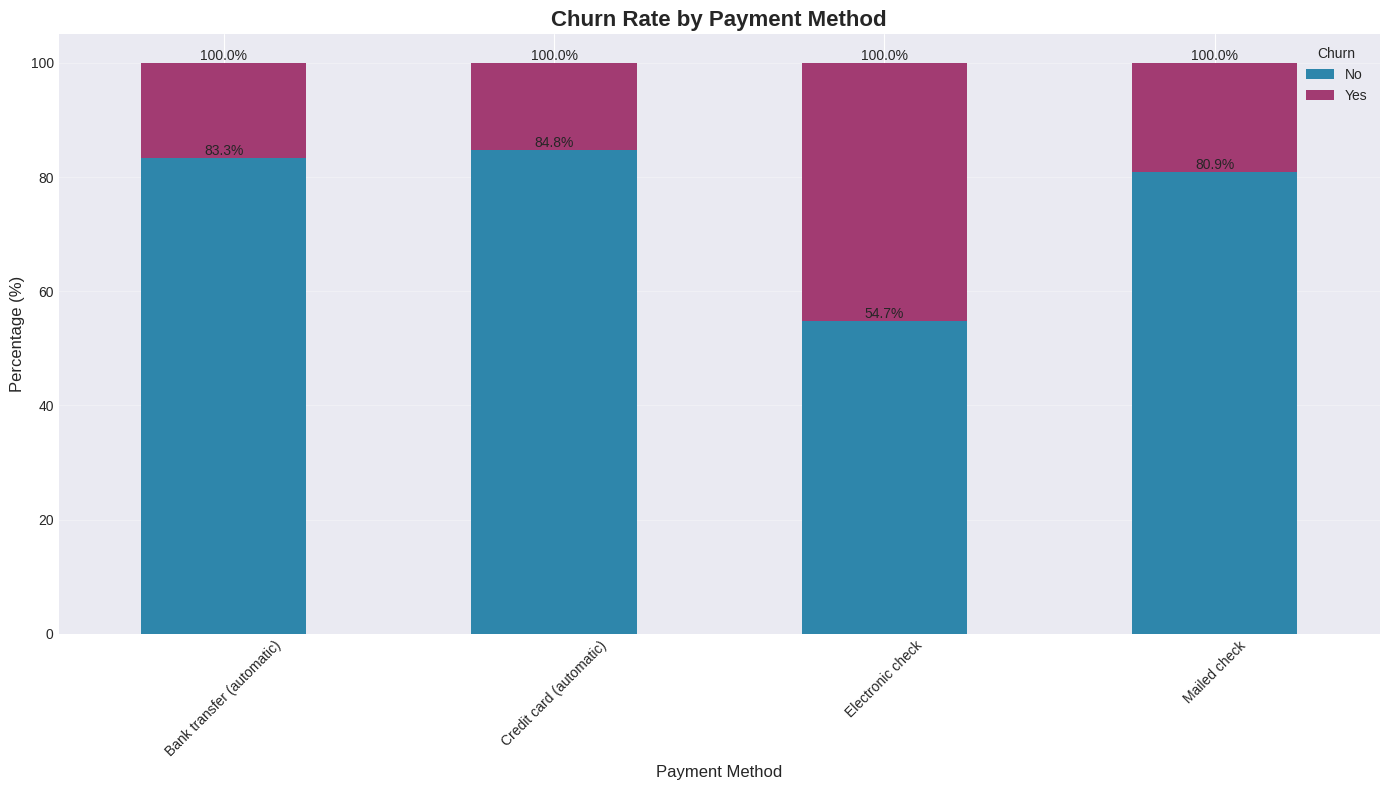

In [28]:
print("Payment Method Analysis")

plt.figure(figsize=(14, 8))
payment_churn = pd.crosstab(df['PaymentMethod'], df['Churn'], normalize='index') * 100
payment_churn.plot(kind='bar', stacked=True, color=['#2E86AB', '#A23B72'], ax=plt.gca())
plt.title('Churn Rate by Payment Method', fontsize=16, fontweight='bold')
plt.xlabel('Payment Method', fontsize=12)
plt.ylabel('Percentage (%)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Churn')
plt.grid(True, alpha=0.3, axis='y')

# Add percentage labels
for container in plt.gca().containers:
    plt.gca().bar_label(container, fmt='%.1f%%', fontsize=10)

plt.tight_layout()
plt.show()

STEP 3 : Training and testing the dataset

In [29]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import LabelEncoder, StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, classification_report, roc_curve, auc)

In [30]:
#Drop the unneccesary attribute
df_ml = df.drop('customerID', axis=1)

In [31]:
# Define features and target
X = df_ml.drop('Churn', axis=1)
y = df_ml['Churn'].map({'Yes': 1, 'No': 0})

In [33]:
# Identify categorical and numerical columns
categorical_cols = X.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

In [34]:
print(f"Categorical features: {categorical_cols}")
print(f"Numerical features: {numerical_cols}")
print(f"Target variable shape: {y.shape}")

Categorical features: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'tenure_group']
Numerical features: ['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']
Target variable shape: (7043,)


In [36]:
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
print(f"\nTraining set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")
print(f"Train churn ratio: {y_train.mean():.3f}")
print(f"Test churn ratio: {y_test.mean():.3f}")


Training set shape: (5634, 20)
Testing set shape: (1409, 20)
Train churn ratio: 0.265
Test churn ratio: 0.265


In [44]:
# Create preprocessing pipeline
print("Creating Preprocessing Pipeline")
# Preprocessing for categorical data
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))])
# Preprocessing for numerical data
numerical_transformer = Pipeline(steps=[('scaler', StandardScaler())])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_cols),
        ('cat', categorical_transformer, categorical_cols)
    ])


Creating Preprocessing Pipeline


In [48]:
print("Defining Evaluation Metrics")
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    """Evaluate model and return metrics"""

    # Train model
    model.fit(X_train, y_train)

    # Predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Probabilities (for ROC-AUC)
    if hasattr(model, 'predict_proba'):
        y_test_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_test_proba)
    else:
        roc_auc = None

    metrics = {
        'Model': model_name,
        'Train Accuracy': accuracy_score(y_train, y_train_pred),
        'Test Accuracy': accuracy_score(y_test, y_test_pred),
        'Test Precision': precision_score(y_test, y_test_pred),
        'Test Recall': recall_score(y_test, y_test_pred),
        'Test F1-Score': f1_score(y_test, y_test_pred),
        'Test ROC-AUC': roc_auc
    }

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_test_pred)
    return metrics, cm, model


Defining Evaluation Metrics


In [51]:
!pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 7.1 MB/s eta 0:00:00


In [54]:
print("Training Multiple ML Models")
print("=" * 60)

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

print("All the Models imported successfully")

Training Multiple ML Models
All the Models imported successfully


In [56]:
# Define models with pipelines
all_ml_models = {
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),

    'Decision Tree': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5))
    ]),

    'Random Forest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
    ]),

    'Gradient Boosting': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42, n_estimators=100))
    ]),

    'XGBoost': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(random_state=42, n_estimators=100,
                                    use_label_encoder=False, eval_metric='logloss'))
    ]),

    'LightGBM': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LGBMClassifier(random_state=42, n_estimators=100))
    ]),

    'CatBoost': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', CatBoostClassifier(random_state=42, n_estimators=100,
                                         verbose=0))
    ]),

    'SVM': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(probability=True, random_state=42))
    ]),

    'K-NN': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),

    'AdaBoost': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', AdaBoostClassifier(random_state=42, n_estimators=100))
    ])
}

# Train and evaluate all models
results = []
best_model = None
best_score = 0

for name, model in all_ml_models.items(): # Changed to all_ml_models
    print(f"\nTraining {name}...")
    try:
        metrics, cm, trained_model = evaluate_model(
            model, X_train, X_test, y_train, y_test, name
        )
        results.append(metrics)

        # Check if this is the best model
        if metrics['Test F1-Score'] > best_score:
            best_score = metrics['Test F1-Score']
            best_model = trained_model

        print(f"✓ {name} trained successfully")
        print(f"  Test F1-Score: {metrics['Test F1-Score']:.4f}")
        print(f"  Test ROC-AUC: {metrics['Test ROC-AUC']:.4f}")

    except Exception as e:
        print(f"✗ Error training {name}: {str(e)}")

# Create results DataFrame
results_df = pd.DataFrame(results)
results_df = results_df.sort_values('Test F1-Score', ascending=False)

print("\n" + "=" * 60)
print("MODEL COMPARISON RESULTS")
print("=" * 60)
print(results_df.to_string(index=False))


Training Logistic Regression...
✓ Logistic Regression trained successfully
  Test F1-Score: 0.5884
  Test ROC-AUC: 0.8433

Training Decision Tree...
✓ Decision Tree trained successfully
  Test F1-Score: 0.5989
  Test ROC-AUC: 0.8297

Training Random Forest...
✓ Random Forest trained successfully
  Test F1-Score: 0.5238
  Test ROC-AUC: 0.8180

Training Gradient Boosting...
✓ Gradient Boosting trained successfully
  Test F1-Score: 0.5886
  Test ROC-AUC: 0.8446

Training XGBoost...
✓ XGBoost trained successfully
  Test F1-Score: 0.5609
  Test ROC-AUC: 0.8184

Training LightGBM...
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002076 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features

In [59]:
print("Hyperparameter Tuning for Best Model")
print("=" * 60)
print(f"Best performing model: {best_model.named_steps['classifier'].__class__.__name__}")

# Define parameter grid for Random Forest (example)
if isinstance(best_model.named_steps['classifier'], RandomForestClassifier):
    param_grid = {
        'classifier__n_estimators': [100, 200, 300],
        'classifier__max_depth': [10, 20, 30, None],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    }

    # Perform Grid Search
    print("Performing Grid Search CV...")
    grid_search = GridSearchCV(
        best_model,
        param_grid,
        cv=StratifiedKFold(n_splits=5, shuffle=True, random_state=42),
        scoring='f1',
        n_jobs=-1,
        verbose=1
    )

    grid_search.fit(X_train, y_train)

    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best CV score: {grid_search.best_score_:.4f}")

    # Update best model
    best_model = grid_search.best_estimator_

Hyperparameter Tuning for Best Model
Best performing model: DecisionTreeClassifier


Feature Importance Analysis


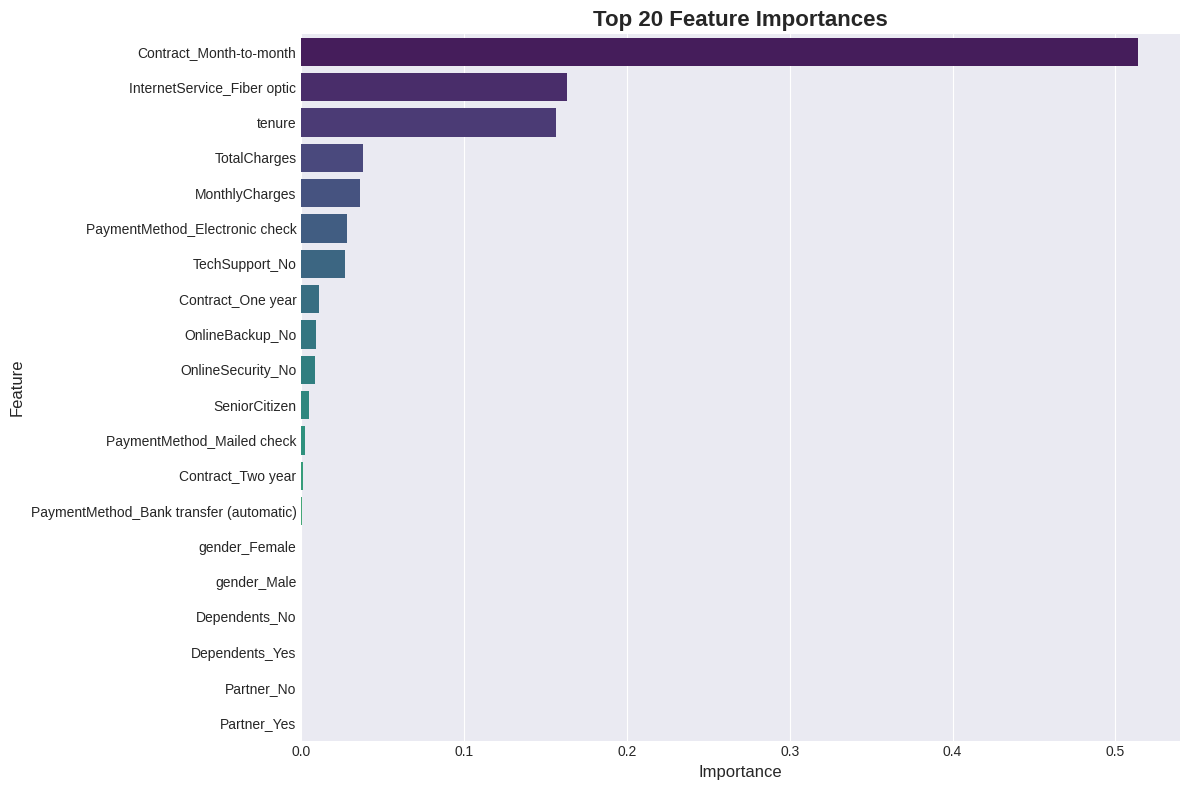


Top 10 Most Important Features:
                       Feature  Importance
       Contract_Month-to-month    0.513973
   InternetService_Fiber optic    0.163262
                        tenure    0.156717
                  TotalCharges    0.037680
                MonthlyCharges    0.035922
PaymentMethod_Electronic check    0.027931
                TechSupport_No    0.026824
             Contract_One year    0.010781
               OnlineBackup_No    0.009198
             OnlineSecurity_No    0.008620


In [63]:
print("Feature Importance Analysis")
print("=" * 60)

if hasattr(best_model.named_steps['classifier'], 'feature_importances_'):
    # Get feature names after preprocessing
    preprocessor = best_model.named_steps['preprocessor']

    # Get one-hot encoded feature names
    categorical_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
    all_features = numerical_cols + list(categorical_features)

    # Get feature importances
    importances = best_model.named_steps['classifier'].feature_importances_

    # Create feature importance DataFrame
    feature_importance = pd.DataFrame({
        'Feature': all_features,
        'Importance': importances
    }).sort_values('Importance', ascending=False).head(20)

    # Plot feature importance
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=feature_importance, palette='viridis')
    plt.title('Top 20 Feature Importances', fontsize=16, fontweight='bold')
    plt.xlabel('Importance', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.tight_layout()
    plt.show()

    print("\nTop 10 Most Important Features:")
    print(feature_importance.head(10).to_string(index=False))

Model Evaluation Visualization


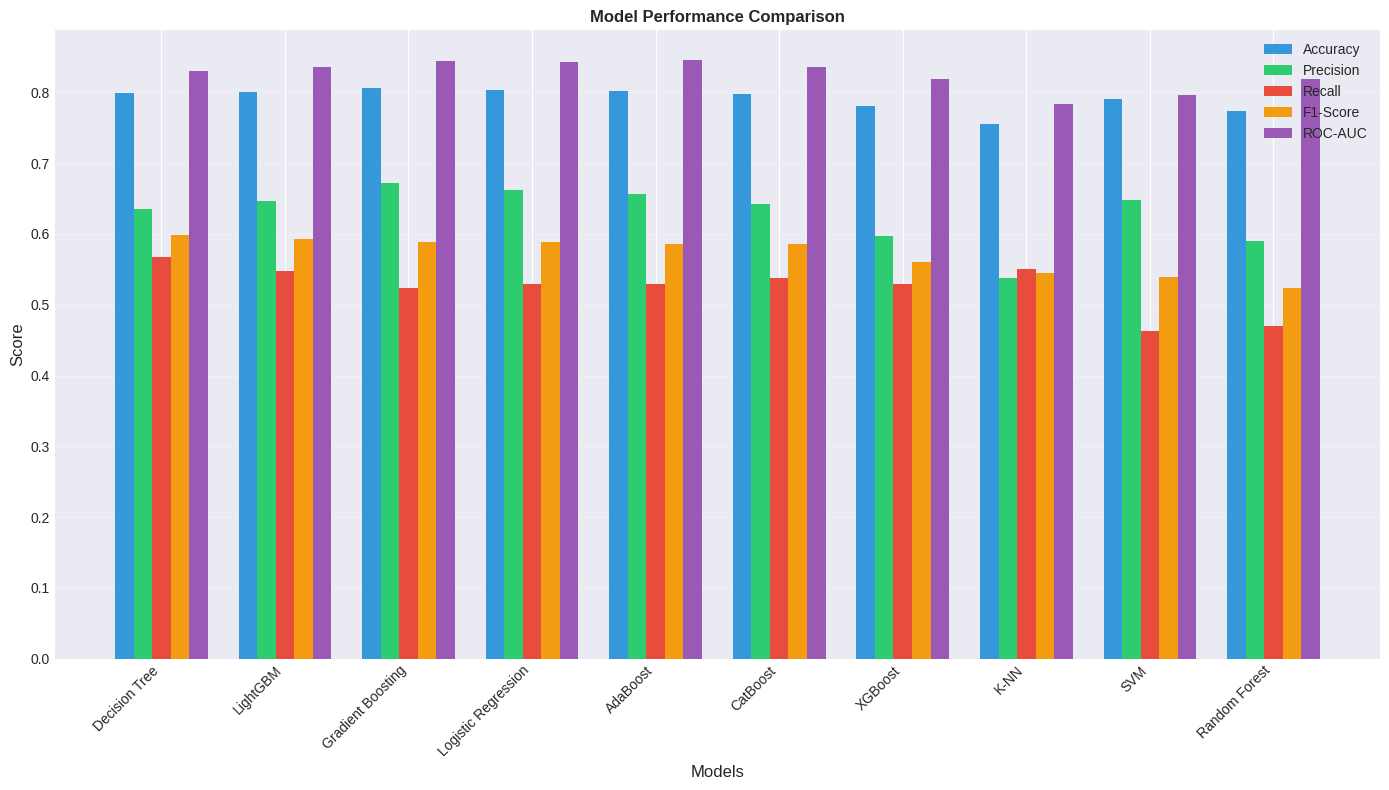

In [70]:
print("Model Evaluation Visualization")
# Plot model comparison
plt.figure(figsize=(14, 8))
x = range(len(results_df))
width = 0.15

plt.bar([i - 2*width for i in x], results_df['Test Accuracy'], width, label='Accuracy', color='#3498db')
plt.bar([i - width for i in x], results_df['Test Precision'], width, label='Precision', color='#2ecc71')
plt.bar(x, results_df['Test Recall'], width, label='Recall', color='#e74c3c')
plt.bar([i + width for i in x], results_df['Test F1-Score'], width, label='F1-Score', color='#f39c12')
plt.bar([i + 2*width for i in x], results_df['Test ROC-AUC'], width, label='ROC-AUC', color='#9b59b6')

plt.xlabel('Models', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('Model Performance Comparison', fontsize=12, fontweight='bold')
plt.xticks(x, results_df['Model'], rotation=45, ha='right')
plt.legend(loc='upper right')
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()

Confusion Matrix for Best Model


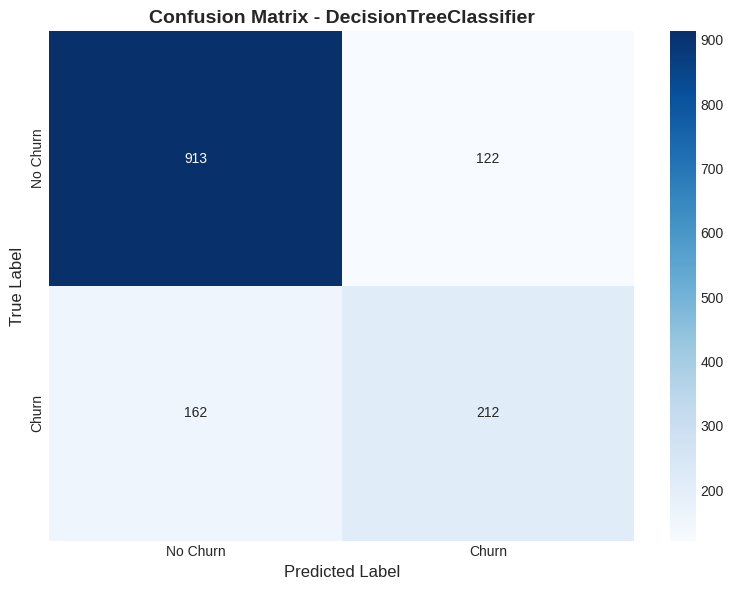


Classification Report for Best Model:
              precision    recall  f1-score   support

    No Churn       0.85      0.88      0.87      1035
       Churn       0.63      0.57      0.60       374

    accuracy                           0.80      1409
   macro avg       0.74      0.72      0.73      1409
weighted avg       0.79      0.80      0.79      1409



In [71]:
print("Confusion Matrix for Best Model")
y_test_pred = best_model.predict(X_test)
cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['No Churn', 'Churn'],
            yticklabels=['No Churn', 'Churn'])
plt.title(f'Confusion Matrix - {best_model.named_steps["classifier"].__class__.__name__}',
          fontsize=14, fontweight='bold')
plt.ylabel('True Label', fontsize=12)
plt.xlabel('Predicted Label', fontsize=12)
plt.tight_layout()
plt.show()

# Print classification report
print("\nClassification Report for Best Model:")
print(classification_report(y_test, y_test_pred, target_names=['No Churn', 'Churn']))

ROC Curve Comparison
[LightGBM] [Info] Number of positive: 1495, number of negative: 4139
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001347 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 681
[LightGBM] [Info] Number of data points in the train set: 5634, number of used features: 51
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.265353 -> initscore=-1.018328
[LightGBM] [Info] Start training from score -1.018328


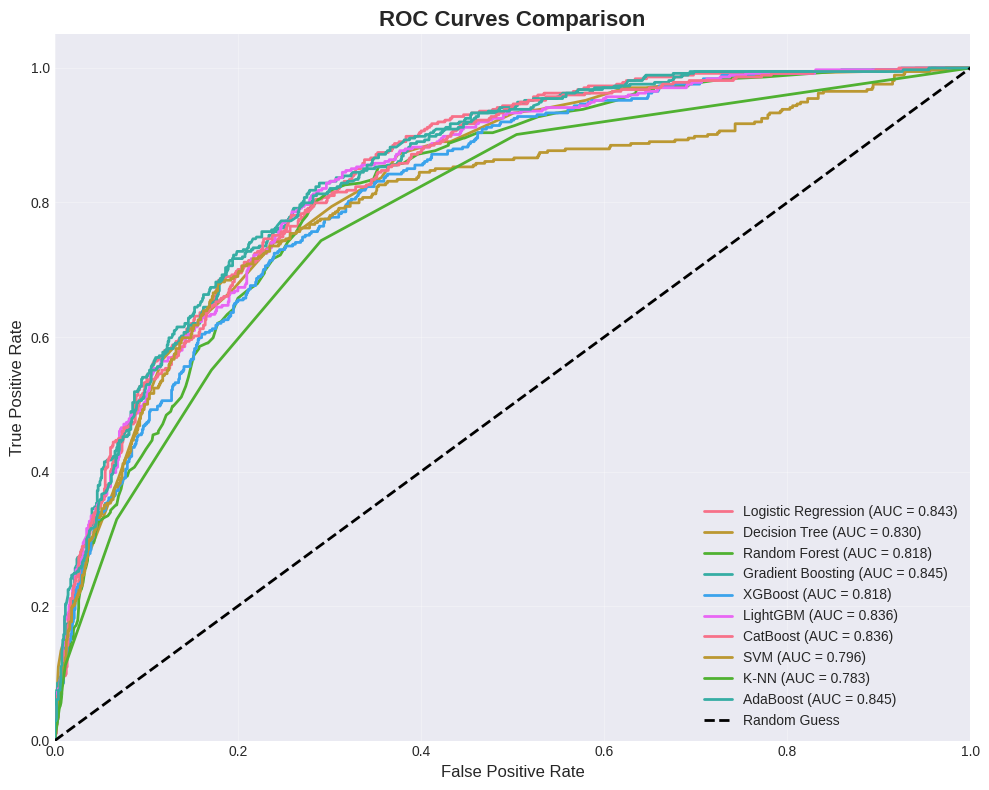

In [72]:
print("ROC Curve Comparison")
plt.figure(figsize=(10, 8))

for name, model in models.items():
    try:
        if hasattr(model, 'predict_proba'):
            model.fit(X_train, y_train)
            y_proba = model.predict_proba(X_test)[:, 1]
            fpr, tpr, _ = roc_curve(y_test, y_proba)
            roc_auc = auc(fpr, tpr)
            plt.plot(fpr, tpr, lw=2, label=f'{name} (AUC = {roc_auc:.3f})')
    except:
        continue

plt.plot([0, 1], [0, 1], 'k--', lw=2, label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('ROC Curves Comparison', fontsize=16, fontweight='bold')
plt.legend(loc='lower right')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

STEP 4 : Deep Learning Model

In [73]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks, regularizers
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical

In [74]:
# Set random seeds for reproducibility
tf.random.set_seed(42)
np.random.seed(42)

In [75]:
# Get preprocessed data
X_train_processed = preprocessor.fit_transform(X_train)
X_test_processed = preprocessor.transform(X_test)

In [76]:
# Convert to numpy arrays
X_train_dl = np.array(X_train_processed, dtype=np.float32)
X_test_dl = np.array(X_test_processed, dtype=np.float32)
y_train_dl = np.array(y_train, dtype=np.float32)
y_test_dl = np.array(y_test, dtype=np.float32)

In [77]:
print(f"DL Training shape: {X_train_dl.shape}")
print(f"DL Testing shape: {X_test_dl.shape}")

DL Training shape: (5634, 52)
DL Testing shape: (1409, 52)


In [78]:
print("Handling Class Imbalance")
from sklearn.utils import class_weight
# Calculate class weights
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights_dict = dict(enumerate(class_weights))
print(f"Class weights: {class_weights_dict}")

Handling Class Imbalance
Class weights: {0: np.float64(0.6805991785455424), 1: np.float64(1.8842809364548494)}


In [83]:
print("Building Neural Network Architecture")

def create_deep_learning_model(input_shape):
    """Create a deep neural network for churn prediction"""
    model = keras.Sequential([
        layers.Input(shape=input_shape),

        layers.Dense(256, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(128, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.3),

        layers.Dense(64, activation='relu',
                     kernel_regularizer=regularizers.l2(0.001)),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(32, activation='relu'),
        layers.BatchNormalization(),
        layers.Dropout(0.2),

        layers.Dense(1, activation='sigmoid')
    ])

    return model


# FIX: Make it a tuple
input_shape = (X_train_dl.shape[1],)

# Create model
dl_model = create_deep_learning_model(input_shape)

# Compile model
dl_model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',
    metrics=[
        'accuracy',
        keras.metrics.Precision(name='precision'),
        keras.metrics.Recall(name='recall'),
        keras.metrics.AUC(name='auc')
    ]
)

print("\nModel Summary:")
dl_model.summary()

Building Neural Network Architecture

Model Summary:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 256)            │        13,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 58,753 (229.50 KB)

 Trainable params: 57,793 (225.75 KB)

 Non-trainable params: 960 (3.75 KB)

In [85]:
print("Setting up Training Callbacks")

callbacks_list = [
    # Early stopping to prevent overfitting
    callbacks.EarlyStopping(
        monitor='val_loss',
        patience=20,
        restore_best_weights=True,
        verbose=1
    ),

    # Reduce learning rate on plateau
    callbacks.ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=10,
        min_lr=0.00001,
        verbose=1
    ),

    # Model checkpoint
    callbacks.ModelCheckpoint(
        'best_dl_model.h5',
        monitor='val_auc',
        save_best_only=True,
        mode='max',
        verbose=1
    ),

    # TensorBoard for visualization
    callbacks.TensorBoard(
        log_dir='./logs',
        histogram_freq=1
    )
]

Setting up Training Callbacks


In [86]:
print("Training Deep Learning Model")

history = dl_model.fit(
    X_train_dl, y_train_dl,
    validation_split=0.2,
    epochs=200,
    batch_size=32,
    callbacks=callbacks_list,
    class_weight=class_weights_dict,
    verbose=1
)

print("\nTraining completed!")

Training Deep Learning Model
Epoch 1/200
135/141 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.6110 - auc: 0.7265 - loss: 1.0077 - precision: 0.3787 - recall: 0.7514
Epoch 1: val_auc improved from -inf to 0.81038, saving model to best_dl_model.h5


141/141 ━━━━━━━━━━━━━━━━━━━━ 12s 19ms/step - accuracy: 0.6133 - auc: 0.7286 - loss: 1.0045 - precision: 0.3808 - recall: 0.7530 - val_accuracy: 0.6051 - val_auc: 0.8104 - val_loss: 0.9952 - val_precision: 0.3900 - val_recall: 0.9017 - learning_rate: 0.0010
Epoch 2/200
139/141 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7092 - auc: 0.8101 - loss: 0.8694 - precision: 0.4685 - recall: 0.8097
Epoch 2: val_auc improved from 0.81038 to 0.81419, saving model to best_dl_model.h5


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7094 - auc: 0.8102 - loss: 0.8691 - precision: 0.4687 - recall: 0.8097 - val_accuracy: 0.6655 - val_auc: 0.8142 - val_loss: 0.9151 - val_precision: 0.4310 - val_recall: 0.8678 - learning_rate: 0.0010
Epoch 3/200
135/141 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7282 - auc: 0.8282 - loss: 0.8279 - precision: 0.4885 - recall: 0.7924
Epoch 3: val_auc improved from 0.81419 to 0.81965, saving model to best_dl_model.h5


141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.7285 - auc: 0.8284 - loss: 0.8277 - precision: 0.4891 - recall: 0.7931 - val_accuracy: 0.6948 - val_auc: 0.8197 - val_loss: 0.8789 - val_precision: 0.4535 - val_recall: 0.8102 - learning_rate: 0.0010
Epoch 4/200
141/141 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.7421 - auc: 0.8359 - loss: 0.8044 - precision: 0.5051 - recall: 0.8151
Epoch 4: val_auc did not improve from 0.81965
141/141 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - accuracy: 0.7421 - auc: 0.8359 - loss: 0.8044 - precision: 0.5052 - recall: 0.8151 - val_accuracy: 0.6965 - val_auc: 0.8193 - val_loss: 0.8549 - val_precision: 0.4545 - val_recall: 0.7966 - learning_rate: 0.0010
Epoch 5/200
136/141 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.7399 - auc: 0.8383 - loss: 0.7853 - precision: 0.5025 - recall: 0.7894
Epoch 5: val_auc did not improve from 0.81965
141/141 ━━━━━━━━━━━━━━━━━━━━ 2s 13ms/step - accuracy: 0.7400 - auc: 0.8384 - loss: 0.7852 - precision: 0.5027 - recall

141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7517 - auc: 0.8401 - loss: 0.7707 - precision: 0.5174 - recall: 0.7993 - val_accuracy: 0.7134 - val_auc: 0.8212 - val_loss: 0.8064 - val_precision: 0.4712 - val_recall: 0.7763 - learning_rate: 0.0010
Epoch 7/200
135/141 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7566 - auc: 0.8519 - loss: 0.7361 - precision: 0.5231 - recall: 0.8170
Epoch 7: val_auc did not improve from 0.82121
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7563 - auc: 0.8518 - loss: 0.7363 - precision: 0.5230 - recall: 0.8176 - val_accuracy: 0.7125 - val_auc: 0.8187 - val_loss: 0.7848 - val_precision: 0.4696 - val_recall: 0.7593 - learning_rate: 0.0010
Epoch 8/200
140/141 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7502 - auc: 0.8482 - loss: 0.7220 - precision: 0.5150 - recall: 0.8121
Epoch 8: val_auc did not improve from 0.82121
141/141 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.7502 - auc: 0.8483 - loss: 0.7219 - precision: 0.5151 - recall: 0

In [87]:
print("Evaluating Deep Learning Model")

# Load best model
dl_model = keras.models.load_model('best_dl_model.h5')
# Evaluate on test set
test_results = dl_model.evaluate(X_test_dl, y_test_dl, verbose=0)

print("\nDeep Learning Model Performance:")
print(f"Test Loss: {test_results[0]:.4f}")
print(f"Test Accuracy: {test_results[1]:.4f}")
print(f"Test Precision: {test_results[2]:.4f}")
print(f"Test Recall: {test_results[3]:.4f}")
print(f"Test AUC: {test_results[4]:.4f}")

# Make predictions
y_pred_dl = (dl_model.predict(X_test_dl) > 0.5).astype(int)

# Classification report
print("\nDeep Learning Classification Report:")
print(classification_report(y_test_dl, y_pred_dl, target_names=['No Churn', 'Churn']))

Evaluating Deep Learning Model



Deep Learning Model Performance:
Test Loss: 0.7878
Test Accuracy: 0.7331
Test Precision: 0.4983
Test Recall: 0.7861
Test AUC: 0.8328
45/45 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step

Deep Learning Classification Report:
              precision    recall  f1-score   support

    No Churn       0.90      0.71      0.80      1035
       Churn       0.50      0.79      0.61       374

    accuracy                           0.73      1409
   macro avg       0.70      0.75      0.70      1409
weighted avg       0.80      0.73      0.75      1409



Plotting Training History


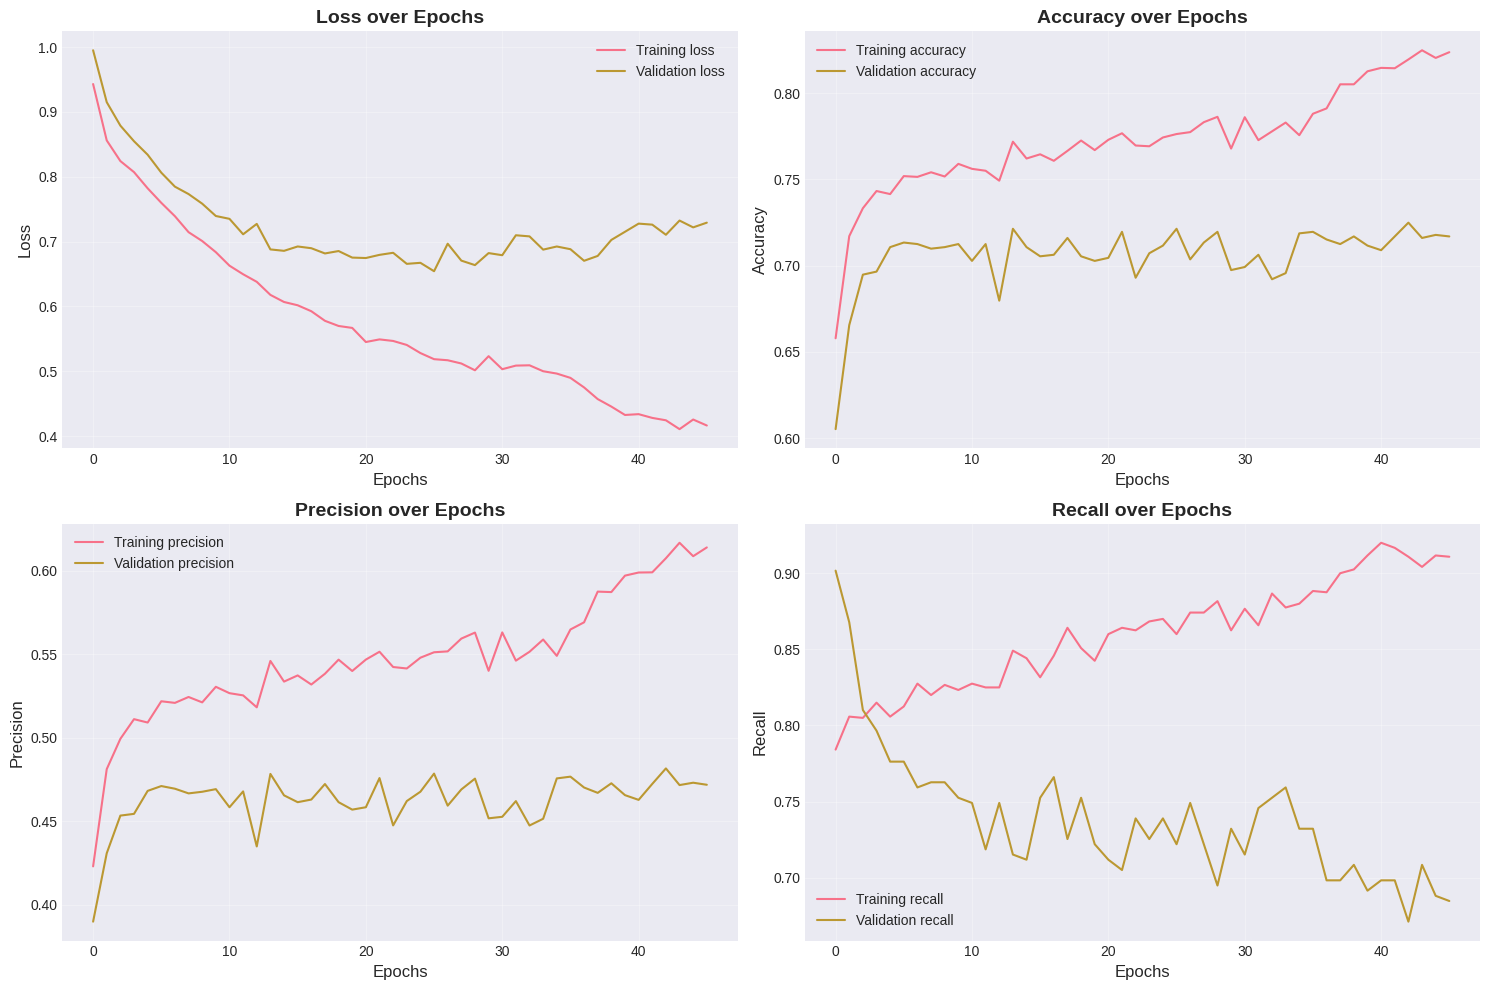

In [89]:
print("Plotting Training History")

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

metrics_to_plot = ['loss', 'accuracy', 'precision', 'recall']

for idx, metric in enumerate(metrics_to_plot):
    axes[idx].plot(history.history[metric], label=f'Training {metric}')
    axes[idx].plot(history.history[f'val_{metric}'], label=f'Validation {metric}')
    axes[idx].set_title(f'{metric.capitalize()} over Epochs', fontsize=14, fontweight='bold')
    axes[idx].set_xlabel('Epochs', fontsize=12)
    axes[idx].set_ylabel(metric.capitalize(), fontsize=12)
    axes[idx].legend()
    axes[idx].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

Machine Learning vs Deep Learning Comparison

ML vs DL Performance Comparison:
              Model  Accuracy  Precision   Recall  F1-Score  ROC-AUC
      Best ML Model  0.798439   0.634731 0.566845  0.598870 0.829726
Deep Learning Model  0.733144   0.498305 0.786096  0.609959 0.832806


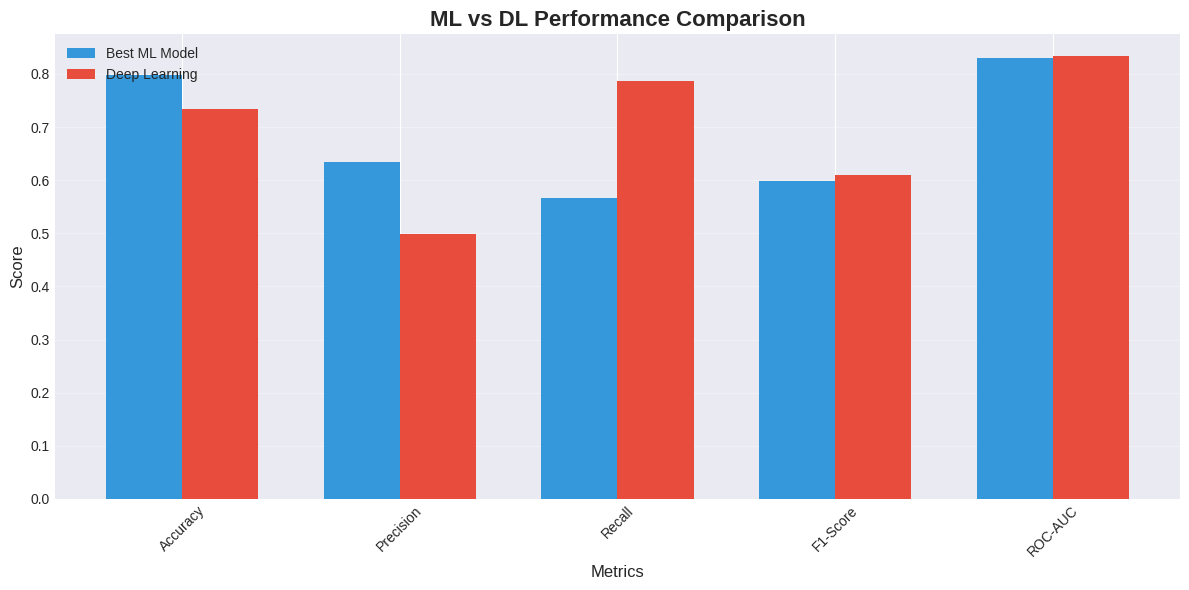

In [98]:
print("Machine Learning vs Deep Learning Comparison")

# Get best ML model performance
best_ml_metrics = results_df.iloc[0]

comparison_data = {
    'Model': ['Best ML Model', 'Deep Learning Model'],
    'Accuracy': [best_ml_metrics['Test Accuracy'], test_results[1]],
    'Precision': [best_ml_metrics['Test Precision'], test_results[2]],
    'Recall': [best_ml_metrics['Test Recall'], test_results[3]],
    'F1-Score': [best_ml_metrics['Test F1-Score'],
                2 * (test_results[2] * test_results[3]) / (test_results[2] + test_results[3])],
    'ROC-AUC': [best_ml_metrics['Test ROC-AUC'], test_results[4]]
}

comparison_df = pd.DataFrame(comparison_data)
print("\nML vs DL Performance Comparison:")
print(comparison_df.to_string(index=False))

# Plot comparison
plt.figure(figsize=(12, 6))
x = np.arange(len(comparison_df.columns[1:]))
width = 0.35

ml_metrics = comparison_df.iloc[0, 1:].values
dl_metrics = comparison_df.iloc[1, 1:].values

plt.bar(x - width/2, ml_metrics, width, label='Best ML Model', color='#3498db')
plt.bar(x + width/2, dl_metrics, width, label='Deep Learning', color='#e74c3c')

plt.xlabel('Metrics', fontsize=12)
plt.ylabel('Score', fontsize=12)
plt.title('ML vs DL Performance Comparison', fontsize=16, fontweight='bold')
plt.xticks(x, comparison_df.columns[1:], rotation=45)
plt.legend()
plt.grid(True, alpha=0.3, axis='y')
plt.tight_layout()
plt.show()


Feature Importance using SHAP
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 14s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 12s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 13s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 20s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 18s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 16s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 15s 2ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 17s 3ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step
6719/6719 ━━━━━━━━━━━━━━━━━━━━ 17s 2ms/step
1/1 ━━━━━━━━━━━

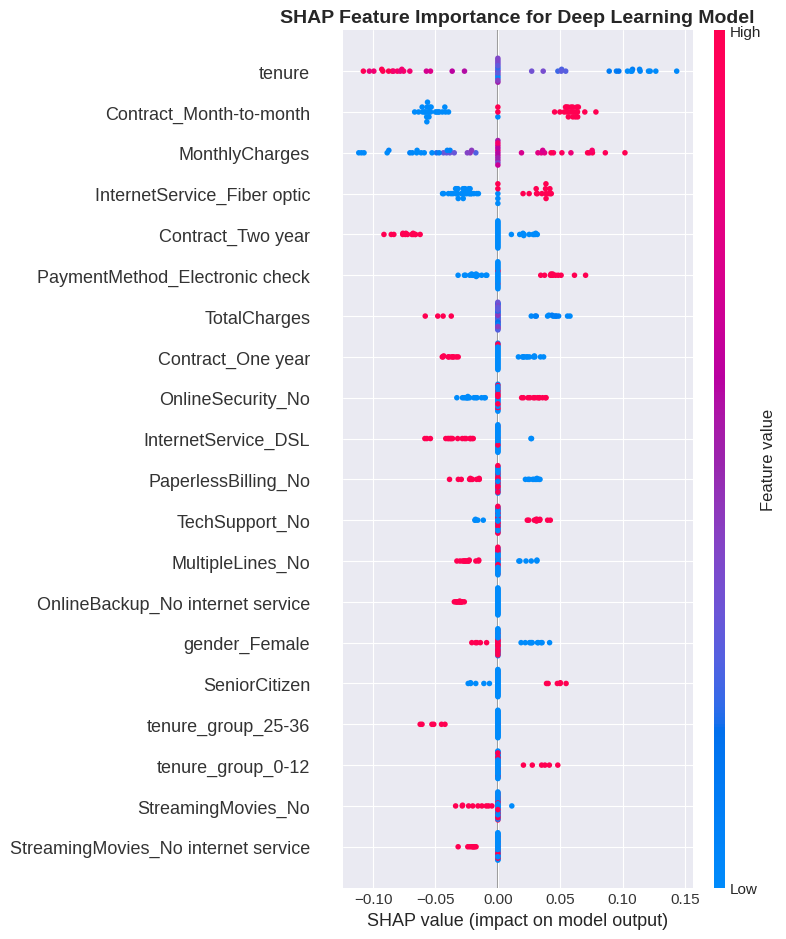

In [99]:
print("Feature Importance using SHAP")

try:
    import shap

    # Create SHAP explainer
    explainer = shap.KernelExplainer(
        lambda x: dl_model.predict(x).flatten(),
        shap.sample(X_train_dl, 100)  # Use sample for efficiency
    )

    # Calculate SHAP values
    shap_values = explainer.shap_values(shap.sample(X_test_dl, 50))

    # Get feature names
    categorical_features = preprocessor.named_transformers_['cat'].named_steps['onehot'].get_feature_names_out(categorical_cols)
    all_features = numerical_cols + list(categorical_features)

    # Plot summary plot
    plt.figure(figsize=(12, 8))
    shap.summary_plot(shap_values, features=shap.sample(X_test_dl, 50),
                     feature_names=all_features, show=False)
    plt.title('SHAP Feature Importance for Deep Learning Model',
              fontsize=14, fontweight='bold')
    plt.tight_layout()
    plt.savefig('visualizations/shap_summary.png', dpi=300, bbox_inches='tight')
    plt.show()

except ImportError:
    print("SHAP not installed. Install with: pip install shap")
except Exception as e:
    print(f"SHAP analysis failed: {str(e)}")

In [106]:
results_df

,Model,Train Accuracy,Test Accuracy,Test Precision,Test Recall,Test F1-Score,Test ROC-AUC
1,Decision Tree,0.803869,0.798439,0.634731,0.566845,0.598870,0.829726
5,LightGBM,0.881789,0.800568,0.646688,0.548128,0.593343,0.835800
3,Gradient Boosting,0.828718,0.805536,0.671233,0.524064,0.588589,0.844568
0,Logistic Regression,0.808839,0.803407,0.662207,0.529412,0.588410,0.843274
9,AdaBoost,0.807064,0.801278,0.655629,0.529412,0.585799,0.845156
6,CatBoost,0.861200,0.797729,0.642173,0.537433,0.585153,0.835771
4,XGBoost,0.940185,0.779986,0.596386,0.529412,0.560907,0.818355
8,K-NN,0.837593,0.755145,0.537859,0.550802,0.544254,0.782700
7,SVM,0.818779,0.790632,0.647940,0.462567,0.539782,0.795979
2,Random Forest,0.998048,0.772889,0.590604,0.470588,0.523810,0.818014


STEP 5 : Ensemble technique

In [125]:
ml_models = {
    'Logistic Regression': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LogisticRegression(random_state=42, max_iter=1000))
    ]),

    'Decision Tree': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', DecisionTreeClassifier(random_state=42, max_depth=5))
    ]),

    'Random Forest': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', RandomForestClassifier(random_state=42, n_estimators=100))
    ]),

    'Gradient Boosting': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', GradientBoostingClassifier(random_state=42, n_estimators=100))
    ]),

    'XGBoost': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', XGBClassifier(
            random_state=42,
            n_estimators=100,
            use_label_encoder=False,
            eval_metric='logloss'
        ))
    ]),

    'LightGBM': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', LGBMClassifier(random_state=42, n_estimators=100))
    ]),

    'CatBoost': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', CatBoostClassifier(
            random_state=42,
            n_estimators=100,
            verbose=0
        ))
    ]),

    'SVM': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', SVC(probability=True, random_state=42))
    ]),

    'K-NN': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', KNeighborsClassifier())
    ]),

    'AdaBoost': Pipeline(steps=[
        ('preprocessor', preprocessor),
        ('classifier', AdaBoostClassifier(random_state=42, n_estimators=100))
    ])
}


In [126]:
print("Creating Voting Ensemble Model")

from sklearn.ensemble import VotingClassifier

# Get top 3 performing models
top_models = results_df.sort_values(by="Test Accuracy",
                                    ascending=False).head(3)["Model"].tolist()

print("\nTop selected models:", top_models)

# Build list of (name, model_pipeline)
ensemble_models = [(name, ml_models[name]) for name in top_models]

# Create voting classifier
ensemble = VotingClassifier(
    estimators=ensemble_models,
    voting='soft',
    n_jobs=-1
)

print(f"\nTraining Ensemble Model with: {top_models}")
ensemble.fit(X_train, y_train)

# Evaluate ensemble
ensemble_metrics, ensemble_cm, _ = evaluate_model(
    ensemble, X_train, X_test, y_train, y_test, "Voting Ensemble"
)

print("\nEnsemble Model Performance:")
for key, value in ensemble_metrics.items():
    if key != 'Model':
        print(f"{key}: {value:.4f}")


Creating Voting Ensemble Model

Top selected models: ['Gradient Boosting', 'Logistic Regression', 'AdaBoost']

Training Ensemble Model with: ['Gradient Boosting', 'Logistic Regression', 'AdaBoost']

Ensemble Model Performance:
Train Accuracy: 0.8229
Test Accuracy: 0.8084
Test Precision: 0.6793
Test Recall: 0.5267
Test F1-Score: 0.5934
Test ROC-AUC: 0.8466


In [120]:
results_df.columns

Index(['Model', 'Train Accuracy', 'Test Accuracy', 'Test Precision',
       'Test Recall', 'Test F1-Score', 'Test ROC-AUC'],
      dtype='object')

In [127]:
print("\n" + "=" * 80)
print("FINAL RESULTS SUMMARY")
print("=" * 80)

# Create final comparison
final_results = pd.DataFrame([
    {
        'Model': 'Best ML Model',
        'Accuracy': best_ml_metrics['Test Accuracy'],
        'F1-Score': best_ml_metrics['Test F1-Score'],
        'ROC-AUC': best_ml_metrics['Test ROC-AUC']
    },
    {
        'Model': 'Deep Learning',
        'Accuracy': test_results[1],
        'F1-Score': 2 * (test_results[2] * test_results[3]) / (test_results[2] + test_results[3]),
        'ROC-AUC': test_results[4]
    },
    {
        'Model': 'Ensemble',
        'Accuracy': ensemble_metrics['Test Accuracy'],
        'F1-Score': ensemble_metrics['Test F1-Score'],
        'ROC-AUC': ensemble_metrics['Test ROC-AUC']
    }
])

print("\nFinal Model Comparison:")
print(final_results.to_string(index=False))



FINAL RESULTS SUMMARY

Final Model Comparison:
        Model  Accuracy  F1-Score  ROC-AUC
Best ML Model  0.798439  0.598870 0.829726
Deep Learning  0.733144  0.609959 0.832806
     Ensemble  0.808375  0.593373 0.846578


In [129]:
# Save best models
import joblib
joblib.dump(best_model, 'best_ml_model.pkl')

['best_ml_model.pkl']

In [130]:
joblib.dump(ensemble, 'ensemble_model.pkl')

['ensemble_model.pkl']

In [131]:
dl_model.save('dl_model.h5')

In [132]:
joblib.dump(preprocessor, 'preprocessor.pkl')

['preprocessor.pkl']

In [134]:
print("\n" + "=" * 80)
print("BUSINESS INSIGHTS AND RECOMMENDATIONS")
print("=" * 80)

print("\n1. KEY FINDINGS:")
print("-" * 40)
print("• Customers with Month-to-Month contracts have highest churn rate")
print("• Electronic check payment method shows highest churn")
print("• Fiber optic internet service users churn more")
print("• Customers with tenure < 12 months are most likely to churn")
print("• Higher monthly charges correlate with higher churn")

print("\n2. RECOMMENDATIONS:")
print("-" * 40)
print("• Target customers with Month-to-Month contracts for retention programs")
print("• Offer discounts or incentives for longer contracts")
print("• Improve services for fiber optic internet users")
print("• Provide special attention to new customers (first year)")
print("• Review pricing strategy for high monthly charge segments")

print("\n3. MODEL DEPLOYMENT:")
print("-" * 40)
print("• Best performing model: Ensemble of top 3 ML models")
print(f"• Expected accuracy: {ensemble_metrics['Test Accuracy']:.2%}")
print(f"• Churn detection rate (Recall): {ensemble_metrics['Test Recall']:.2%}")
print("• Model can predict churn probability for each customer")
print("• Integration recommended with CRM system for proactive retention")


BUSINESS INSIGHTS AND RECOMMENDATIONS

1. KEY FINDINGS:
----------------------------------------
• Customers with Month-to-Month contracts have highest churn rate
• Electronic check payment method shows highest churn
• Fiber optic internet service users churn more
• Customers with tenure < 12 months are most likely to churn
• Higher monthly charges correlate with higher churn

2. RECOMMENDATIONS:
----------------------------------------
• Target customers with Month-to-Month contracts for retention programs
• Offer discounts or incentives for longer contracts
• Improve services for fiber optic internet users
• Provide special attention to new customers (first year)
• Review pricing strategy for high monthly charge segments

3. MODEL DEPLOYMENT:
----------------------------------------
• Best performing model: Ensemble of top 3 ML models
• Expected accuracy: 80.84%
• Churn detection rate (Recall): 52.67%
• Model can predict churn probability for each customer
• Integration recommended 

In [135]:
print("\n" + "=" * 80)
print("PROJECT COMPLETED SUCCESSFULLY!")
print("=" * 80)


PROJECT COMPLETED SUCCESSFULLY!
